## Preparando los datos

Descargar los datos:

https://archive.ics.uci.edu/ml/datasets/bank+marketing



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/bank/bank.csv',sep=';')
df['y'] = df['y'].replace('yes',1).replace('no',0) 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


## Undersampling

In [2]:
df_no = df[df['y'] == 0]
df_yes = df[df['y'] == 1]
df_no_reduced = df_no.sample(df_yes.shape[0],random_state=103)
df_reduced = pd.concat([df_no_reduced,df_yes],axis=0)
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3437,26,services,single,secondary,no,209,yes,no,cellular,22,jul,319,2,-1,0,unknown,0
4125,30,technician,married,secondary,no,-393,yes,yes,cellular,16,jul,435,1,-1,0,unknown,1
4416,32,blue-collar,single,secondary,no,811,yes,no,cellular,14,may,563,1,-1,0,unknown,1
1532,33,technician,married,secondary,no,133,no,no,cellular,4,may,218,1,-1,0,unknown,1
1017,49,blue-collar,married,secondary,no,-454,yes,no,cellular,14,may,558,1,-1,0,unknown,1


In [3]:
df_reduced.y.value_counts()

1    521
0    521
Name: y, dtype: int64

## Spliting

In [4]:
X = df_reduced[['duration','age']]
y = df_reduced['y']
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=103)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

## Metrics

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

0.7238372093023255
             precision    recall  f1-score   support

          0       0.69      0.82      0.75       176
          1       0.77      0.62      0.69       168

avg / total       0.73      0.72      0.72       344



# Curvas ROC

Curva de Característica Operativa del Receptor, o Curve The Receiver Operating Characteristic Curve, mejor conocida como ROC, es un método adicional para medir la calidad de un modelo de clasificación binario.

Para graficarlo se contrasta el TPR contra FPR para cada probabilidad de predicción:

#### Recall o true positive rate (TPR)

Porcentaje de casos positivos correctamente clasificados
(Si y era Si)
$$TPR=\frac{TP}{TP+FN}$$

#### fall-out o false positive rate (FPR)

Porcentaje de casos negativos incorrectamente clasificados
(Si y era No)
$$FPR=\frac{FP}{FP+TN}$$

Después se calcula el área bajo la curva. Entre más área mejor el modelo.

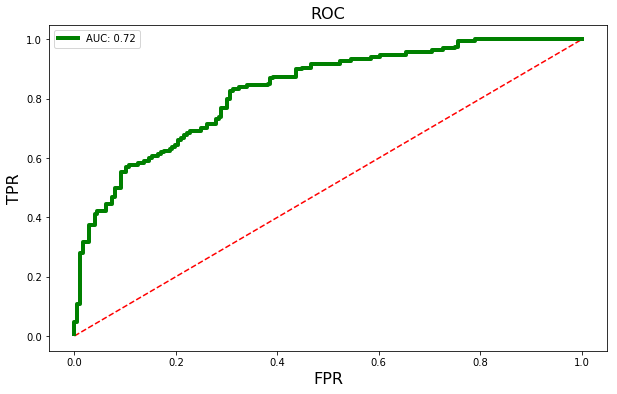

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

probs = clf.predict_proba(X_test)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();

Regla de dedo para un área bajo la curva en una curva ROC es:

- [0.5]: Equivalente a aleatorio.
- [0.5, 0.6): Test malo.
- [0.6, 0.75): Test regular.
- [0.75, 0.9): Test bueno.
- [0.9, 0.95): Test muy bueno.
- [0.95, 1): Muy bueno para ser cierto.

# Cumulative Accuracy Profile CAP

El perfil de precisión acumulativa o CAP se utiliza para visualizar el poder discriminativo de un modelo. El CAP de un modelo representa el número acumulado de resultados positivos a lo largo del eje y versus el número acumulado correspondiente de un parámetro de clasificación a lo largo del eje x.

In [8]:
df_cap = df.sample(1000,random_state=20)
cap_X = df_cap[['duration','age']]
df_cap.y.value_counts()

0    900
1    100
Name: y, dtype: int64

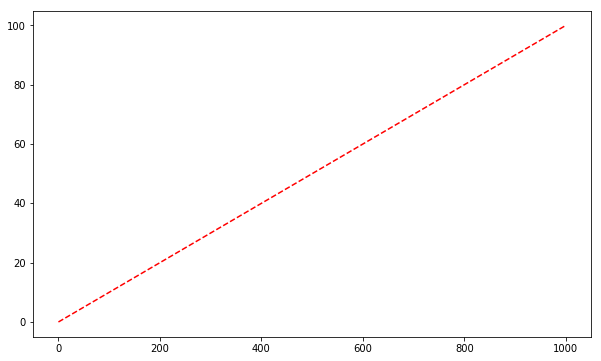

In [9]:
df_cap = df.sample(1000,random_state=20)
cap_X = df_cap[['duration','age']]

plt.figure(figsize = (10, 6))
plt.plot([0,1000], [0,100], 'r--');
# # -------------------------------------
# perfect_model = np.cumsum(np.repeat(1,100)) #Suma acumulativa
# perfect_model.resize(1000)
# perfect_model[100:] = 100
# perfect_model
# plt.plot(perfect_model);
# # -------------------------------------
# df_cap['probs'] = clf.predict_proba(cap_X)[:, 1]  #Probabilidades
# df_cap = df_cap.sort_values(by='probs',ascending=False)
# probs = np.cumsum(df_cap.y).values
# plt.plot(probs,c = 'g', label = label, linewidth = 4);
# # -------------------------------------
# plt.xlabel('Total de personas', fontsize = 16)
# plt.ylabel('Total de inversiones (casos si)', fontsize = 16)
# plt.title('CAP', fontsize = 16)
# # -------------------------------------
# plt.axvline(x=500, color='g', linestyle='--',alpha=0.5)
# plt.axhline(y=probs[499], color='g', linestyle='--',alpha=0.5)

# probs[499]

- [0,0.6]: Equivalente a aleatorio o peor.
- [0.6, 0.7): Test malo.
- [0.7, 0.8): Test bueno.
- [0.8, 0.90): Test muy bueno.
- [0.90, 1): Muy bueno para ser cierto.

In [10]:
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3437,26,services,single,secondary,no,209,yes,no,cellular,22,jul,319,2,-1,0,unknown,0
4125,30,technician,married,secondary,no,-393,yes,yes,cellular,16,jul,435,1,-1,0,unknown,1
4416,32,blue-collar,single,secondary,no,811,yes,no,cellular,14,may,563,1,-1,0,unknown,1
1532,33,technician,married,secondary,no,133,no,no,cellular,4,may,218,1,-1,0,unknown,1
1017,49,blue-collar,married,secondary,no,-454,yes,no,cellular,14,may,558,1,-1,0,unknown,1


En general cuando construimos modelos predictivos, los métodos usados asumen que los datos son cuantitativos. Por ejemplo, variables como edad o saldo. En realidad, los datos pueden venir en forma categórica, por ejemplo, estado civil, genero, nivel de educación entre otros. Nosotros como científicos de datos podemos transformar los datos categóricos a numéricos para permitir a los algoritmos manejarlos más fácilmente pues recordemos que en realidad los modelos creados representan una función matemática.

Para ello tenemos dos alternativas:
 - Asignarles un valor numérico secuencial. Solo se puede utilizar cuando las categorías tienen un orden natural como por ejemplo el nivel de educación.
 - Utilizar variables ficticias o dummy.
 
 # Variables Dummy
 
Una variable ficticia es una variable artificial para representar una variable categórica con dos o más categorías.


In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [12]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [13]:
columns_to_dummy = df.columns[df.dtypes == np.object]
columns_to_dummy

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [14]:
df_w_dummy = pd.get_dummies(df,prefix=columns_to_dummy)
df_w_dummy.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [15]:
df_w_dummy.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

### Trampa de las variables ficticias

La trampa de las variables ficticias es un escenario en el cual dos o mas variables independientes son multicolineales, en términos más sencillos, es cuando con una variable podemos predecir la o las otras. La consecuencia de utilizar variables multicolineales es que nuestro modelo no pueda utilizar correctamente esa información. 


Para evitar caer en la trampa de la variable ficticia, una regla de dedo es utilizar una variable ficticia menos que el número de categorías.  Afortunadamente Python lo puede hacer de forma automática.


In [16]:
df_w_dummy = pd.get_dummies(df,prefix=columns_to_dummy,drop_first=True)
df_w_dummy.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
df_w_dummy.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [18]:
#UnderSampling
df_no = df_w_dummy[df_w_dummy['y'] == 0]
df_yes = df_w_dummy[df_w_dummy['y'] == 1]
df_no_reduced = df_no.sample(521,random_state=103)
df_reduced = pd.concat([df_no_reduced,df_yes],axis=0)
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced = df_reduced.astype('float')
df_reduced.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3437,26.0,209.0,22.0,319.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4125,30.0,-393.0,16.0,435.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4416,32.0,811.0,14.0,563.0,1.0,-1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1532,33.0,133.0,4.0,218.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1017,49.0,-454.0,14.0,558.0,1.0,-1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


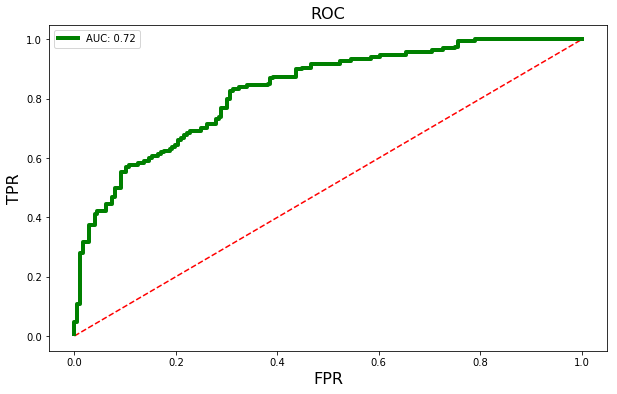

In [19]:
# Ejercicio

#
X = df_reduced[['duration','age']]
y = df_reduced['y']

#
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=103)

#
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

#
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

#
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)
label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();

# Selección de características

Una vez que ya tratamos con las variables categóricas, nos quedo un conjunto de datos con 43 variables. Seguramente algunas de ellas son completamente irrelevantes, es decir, no aportan nada o casi nada a nuestros modelos predictivos. Estas variables irrelevantes pueden dar problemas a nuestras estimaciones. Las variables irrelevantes:
- Desperdician memoria RAM.
- Actúan como ruido.
- Aumentan el tiempo de entrenamiento.

Una solución a este problema es la selección de características relevantes. Que es básicamente el proceso de seleccionar las variables o características más relevantes de un conjunto de datos. Hay básicamente tres tipos de métodos de selección de características:
- Métodos de filtrado: Son aquellos que utilizan medidas estadísticas para ordenar las variables por su significancia.
- Métodos de envoltura: Son aquellos que utilizan modelos predictivos par determinar la calidad de las variables seleccionadas.
- Métodos integrados: Son aquellos que incorporan el proceso de selección en la fase de entrenamiento del modelo predictivo. El ejemplo más común es el árbol de decisión.

La selección de métodos de envoltura, se realizan usualmente a manera de prueba y error y además de manera iterativa. Esta técnica se conoce como selección paso a paso o stepwise. 
Es importante recalcar que selección de características es diferente a la reducción de dimensionalidad. Aunque ambos métodos buscan reducir el número de características, la reducción de dimensionalidad lo hace transformando el conjunto de datos completo. Esto está fuera de las intenciones de este cuaderno, pero es bueno saber que existe una diferencia desde ahora.


<img src="img/forward.png" alt="Forward Selection" >
<center><h3>Forward Selection</h3></center>


<img src="img/backward.png" alt="Backward Selection">
<center><h3>Backward Selection</h3></center>

In [20]:
from sklearn.preprocessing import MinMaxScaler
X = df_reduced.drop("y",axis=1)
y = df_reduced.y
X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=103)

In [21]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(solver='lbfgs')
selector = RFE(estimator, 8, step=1)
selector = selector.fit(X_train, y_train.ravel())

print(selector.support_)
print(selector.ranking_)

[False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False  True False False  True
  True  True False False  True False]
[10  8 28  1  1 27 11  5 30 13 23  3 22 35 21  9  4 34 18 19 24 29 26 33
 14 12 16  1 15 31 32  2  1 25  6  1  1  1 17 20  1  7]


In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [23]:
best_variables = selector.support_
df_reduced.loc[:, best_variables].head()

,duration,campaign,contact_telephone,month_jan,month_mar,month_may,month_nov,poutcome_other
3437,319.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4125,435.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4416,563.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1532,218.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1017,558.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
clf = LogisticRegression(solver='lbfgs').fit(X_train[:,best_variables], y_train.ravel())
y_test_hat = clf.predict(X_test[:,best_variables])

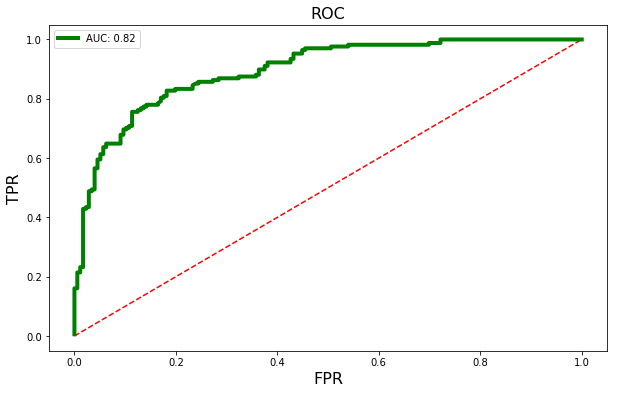

In [25]:
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

probs = clf.predict_proba(X_test[:,best_variables])
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)
label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();